In [4]:
import scipy.io
import numpy as np
import math
from sklearn import preprocessing
import random
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline 

def plot_num(center):
    center = np.reshape(center, (28, 28))
    plt.figure()
    plt.imshow(center)
    plt.colorbar()
    
def distance(instance1, instance2):
    return np.linalg.norm(instance1 - instance2)

def get_neighbors(instance,train_img, train_labels, K):
    distances = []
    for i in range(len(train_img)):
        dist = distance(instance, train_img[i])
        distances.append((train_img[i], dist, train_labels[i]))
    distances.sort(key=lambda x: x[1])
    return distances[:K]

def vote(neighbors,K):
    #img, dist,label
    counts = np.array([0]*10)
    best_label, best_dist, best_img = 0, 9999, neighbors[0][0]
    for i in range(K):
        img, dist,label = neighbors[i]
        counts+= label
        if best_dist > dist:
            best_label, best_dist,best_img = label, dist,img
    best_count = max(counts)
#     print "counts", counts
#     print "best_label, best_dist",best_label, best_dist
#     plot_num(best_img)
    best_labels = np.where(counts == best_count)[0]
#     print "best_labels", best_labels
    if len(best_labels) == 1:
        result = np.array([0]*10)
        result[best_labels[0]]=1
        return result
    else:
        return best_label
    
def weighted_vote(neighbors, K):
    counts = np.array([0]*10)
    for i in range(K):
        img, dist,label = neighbors[i]
        counts = counts + label*1.0/(i+1)
    result = np.array([0]*10)
    result[np.argmax(counts)] = 1
    return result

data = scipy.io.loadmat('dataset/train.mat')
print data.keys()
train_labels = data['train_labels']
train_img = data['train_images']
x = len(train_img)
y = len(train_img[0])
z = len(train_img[0][0])
print x,y,z
train_img = np.reshape(train_img, (x * y, z))
train_img = np.swapaxes(train_img ,0,1)

print len(train_img[0])
print train_img.shape
print train_labels
lb = preprocessing.LabelBinarizer()
lb.fit(range(10))
train_labels = lb.transform(train_labels)
test = scipy.io.loadmat('dataset/test.mat')
print test.keys()
test_img = test['test_images']
x = len(test_img)
y = len(test_img[0])
z = len(test_img[0][0])
test_img = np.reshape(test_img, (x * y, z))
test_img = np.swapaxes(test_img ,0,1)

print test_img.shape


train_img ,train_labels = shuffle(train_img, train_labels, random_state=0)
train_img = preprocessing.scale(train_img)
X = train_img[:55000]
y = train_labels[:55000]
Xv = train_img[55000:]
print Xv.shape
yv = train_labels[55000:]

['train_labels', 'train_images', '__version__', '__header__', '__globals__']
28 28 60000
784
(60000, 784)
[[0]
 [0]
 [0]
 ..., 
 [9]
 [9]
 [9]]
['__version__', '__header__', 'test_images', '__globals__']
(10000, 784)


/Users/Justinsty/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


(5000, 784)


In [5]:
# print distance(X[0],X[1])
K = 10
count = 0
interval = 100
vali_acc = []
for i in range(5000):
    neighbors = get_neighbors(Xv[i], train_img, train_labels, K)
    #img, dist,label
    result = vote(neighbors,K)
    result = weighted_vote(neighbors,K)
    if list(result) == list(yv[i]):
        count += 1
    acc = 1.0*count/(i+1)
    if (i+1)%interval == 0:
        vali_acc.append(acc)
        print i,result, yv[i], list(result) == list(yv[i]), acc

99 [0 0 0 0 0 0 0 0 0 1] [0 0 0 0 0 0 0 0 0 1] True 0.99
199 [0 0 1 0 0 0 0 0 0 0] [0 0 1 0 0 0 0 0 0 0] True 0.985
299 [0 0 0 1 0 0 0 0 0 0] [0 0 0 1 0 0 0 0 0 0] True 0.983333333333
399 [0 0 0 0 0 0 1 0 0 0] [0 0 0 0 0 0 1 0 0 0] True 0.9825
499 [0 0 0 0 0 0 0 0 1 0] [0 0 0 0 0 0 0 0 1 0] True 0.978
599 [0 0 0 1 0 0 0 0 0 0] [0 0 0 1 0 0 0 0 0 0] True 0.975
699 [0 0 0 0 0 1 0 0 0 0] [0 0 0 0 0 1 0 0 0 0] True 0.971428571429
799 [0 1 0 0 0 0 0 0 0 0] [0 1 0 0 0 0 0 0 0 0] True 0.9725
899 [0 0 1 0 0 0 0 0 0 0] [0 0 1 0 0 0 0 0 0 0] True 0.975555555556
999 [0 0 0 0 0 0 0 0 0 1] [0 0 0 0 0 0 0 0 0 1] True 0.978
1099 [0 1 0 0 0 0 0 0 0 0] [0 1 0 0 0 0 0 0 0 0] True 0.976363636364
1199 [0 0 0 0 0 0 0 0 0 1] [0 0 0 0 0 0 0 0 0 1] True 0.9775
1299 [0 0 0 0 0 0 1 0 0 0] [0 0 0 0 0 0 1 0 0 0] True 0.978461538462
1399 [0 0 0 0 0 0 0 1 0 0] [0 0 0 0 0 0 0 1 0 0] True 0.978571428571
1499 [0 0 0 0 0 0 0 0 1 0] [0 0 0 0 0 0 0 0 1 0] True 0.979333333333
1599 [0 0 0 0 0 1 0 0 0 0] [0 0 0 0 0 1 0 0 0 

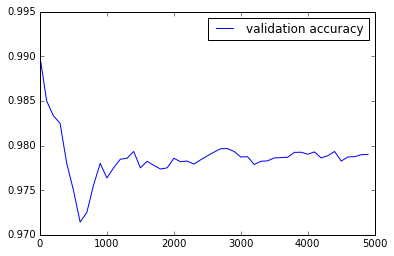

In [6]:
plt.plot([i * interval for i in range(len(vali_acc))], vali_acc)
plt.legend(['validation accuracy'], loc = 'upper right')
plt.show()